In [1]:
# Libraries & Settings:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gdown
import scipy.stats as stats
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings
from scipy.stats import spearmanr

# Project Overview

* **Context:** In this project, we'll analyze a dataset of the Melbourne housing market from 2016 to 2018.

* **Goal:** We will be using EDA statistical techniques and Python to review and assess the housing market and drive insightfull conlsuions from the  Melbourne housing market.


Here's a breakdown of the columns in the Melbourne Housing DataFrame:

- **Suburb:** Name of the suburb where the property is located.
- **Address:** Address of the property.
- **Rooms:** Number of rooms in the property.
- **Type:** Type of property (e.g., house, unit, townhouse).
- **Price:** Price of the property.
- **Method:** Method of sale (e.g., auction, private sale).
- **SellerG:** Real estate agent or agency handling the sale.
- **Date:** Date of sale.
- **Distance:** Distance from the property to the central business district (CBD) or another point of interest.
- **Postcode:** Postal code of the area where the property is located.
- **Bedroom2:** Number of bedrooms (alternate method of recording).
- **Bathroom:** Number of bathrooms.
- **Car:** Number of car spaces.
- **Landsize:** Size of the land associated with the property.
- **BuildingArea:** Area of the building on the property.
- **YearBuilt:** Year the property was built.
- **CouncilArea:** Local council governing the area where the property is located.
- **Lattitude:** Latitude coordinate of the property location.
- **Longtitude:** Longitude coordinate of the property location.
- **Regionname:** Name of the region where the property is located.
- **Propertycount:** Number of properties in the area.


# Data Extraction

In [2]:
# Melbourne housing dataset:
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df = df.copy()

In [5]:
df.shape

(34857, 21)

In [6]:
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


# Data Cleaning

## [Date]

In [7]:
# Cleaningh date format and changing date to 'Datetime':
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [8]:
# Creating column with only sold year
df['Year'] = df['Date'].dt.year

In [9]:
# Creating column with only sold month
df['Month'] = df['Date'].dt.month

In [10]:
# Extract month from 'Date' column
sales_by_month = df['Date'].dt.month.value_counts().sort_index()

In [11]:
# Find the month sales
top_sales_month = sales_by_month.idxmax()
top_sales_month

11

## [Price]  




In [12]:
# Amount of null values in Price Column:
null_price_sum = df['Price'].isnull().sum()
null_price_sum

7610

In [13]:
# Percentage of 'Price' null values over total calculation:
pct_null_price_to_total = ((null_price_sum / (len(df)))*100).round(2)
print(f"The percentage of 'Price' null values over the total is: {pct_null_price_to_total}")

The percentage of 'Price' null values over the total is: 21.83


In [14]:
# Remove (drop) null values in price:
df.dropna(subset=['Price'], inplace=True)

In [15]:
# Changing Price type to int
df['Price'] = df['Price'].astype(int)

In [16]:
# Filter Year data subsets
df_2016 = df[df['Date'].dt.year == 2016]
df_2018 = df[df['Date'].dt.year == 2018]

In [17]:
# 2016 Median price
median_df_2016 = df_2016['Price'].median()
median_df_2016

885000.0

In [18]:
# 2018 Median price
median_df_2018 = df_2018['Price'].median()
median_df_2018

836500.0

In [19]:
# Percentage increase
pct_price_dif_2016_2018 = ((median_df_2018-median_df_2016)/median_df_2016)*100
pct_price_dif_2016_2018

-5.480225988700565

# Insights & Findings


## Property Type

Analyze the the frquenecy of property types:

In [20]:
# Type of properties availiable:
df['Type'].unique()

array(['h', 't', 'u'], dtype=object)

In [21]:
# Counting property types:
property_type_df = df['Type'].value_counts()
property_type_df

Type
h    18472
u     5909
t     2866
Name: count, dtype: int64

In [22]:
# Percentage of most common property over total
pct_h_type_total = (23980/len(df))*100
print(f"The percentage of 'Houses' Porperty type over total is: {pct_h_type_total}")

The percentage of 'Houses' Porperty type over total is: 88.00968914008882


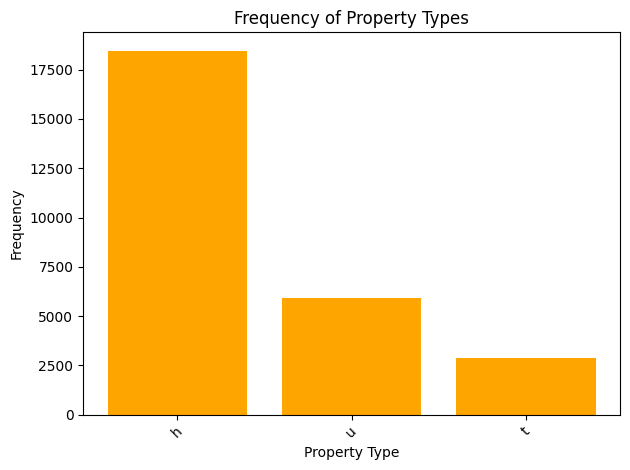

In [23]:
# Create a bar plot
plt.bar(property_type_df.index, property_type_df.values, color='orange')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.title('Frequency of Property Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

## Number of Rooms

The idea is to see how the number of `rooms` affect property Price.

In [24]:
# Filter a subste of Rooms and median price and sort from low to high:
median_price_per_room = (df.groupby('Rooms')['Price'].median()).sort_values(ascending=True)
median_price_per_room

Rooms
1      390000.0
2      678000.0
3      900000.0
4     1205250.0
7     1350000.0
9     1380000.0
8     1535883.0
5     1550000.0
6     1660000.0
10    2115000.0
12    2705000.0
16    5000000.0
Name: Price, dtype: float64

### Correlation Analysis

In [25]:
# Spearman Correlation Analysis between [Rooms] & [Price]:
spearmanr(df['Rooms'], df['Price'])

SignificanceResult(statistic=0.5042971590926004, pvalue=0.0)

**Spearman Conclusions**: p-value is close to 0 so no major correlation.

## Distance (to city center)

In [26]:
# Filter data subset of Price and Distance (to city center):
price_groupby_distance = df.groupby('Distance')['Price']
price_groupby_distance.head()

1        1480000
2        1035000
4        1465000
5         850000
6        1600000
          ...   
31820     790000
32083     625000
32383     667000
32688     750000
34348     522000
Name: Price, Length: 1008, dtype: int64

## Region Analysis

In [27]:
# Filter by Region name and price, sorted from low to high:
region_price_df_median = (df.groupby('Regionname')['Price'].median()).sort_values(ascending=True)
region_price_df_median

Regionname
Western Victoria               412125.0
Northern Victoria              565000.0
Eastern Victoria               679000.0
Western Metropolitan           750000.0
Northern Metropolitan          752500.0
South-Eastern Metropolitan     811250.0
Eastern Metropolitan          1015000.0
Southern Metropolitan         1250000.0
Name: Price, dtype: float64

## Quantiles Anlysis

Checking `Landsize` median price grouped in 3 Quantiles

In [28]:
# Testing with 3 quantiles:
num_quantiles_3 = 3

In [29]:
# Do 'Landsize' into categories based on quantiles (q=3)
df['Landsize_q3'] = pd.qcut(df['Landsize'], num_quantiles_3, labels=False)

In [30]:
median_price_by_category_q3 = df.groupby('Landsize_q3')['Price'].median()

Text(0, 0.5, 'Median Price')

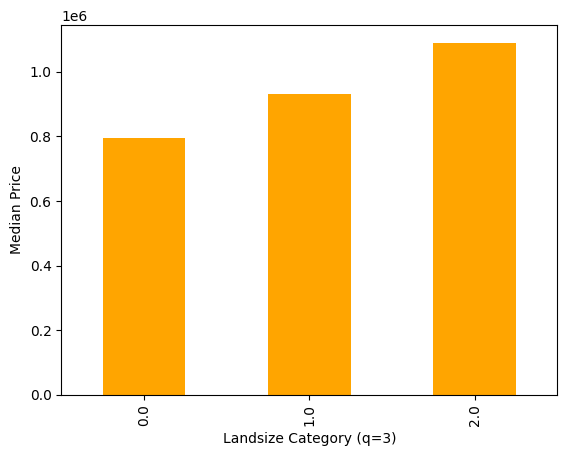

In [31]:
# Plotting the bar plot for q=3
median_price_by_category_q3.plot(kind='bar', color='orange')
plt.xlabel('Landsize Category (q=3)')
plt.ylabel('Median Price')

Checking `Landsize` median price grouped in 7 Quantiles

In [32]:
# Testing with 7 quantiles:
num_quantiles_7 = 7

In [33]:
# landsize into q7
df['Landsize_q7'] = pd.qcut(df['Landsize'], num_quantiles_7, labels=False)

In [34]:
median_price_by_category_q7 = df.groupby('Landsize_q7')['Price'].median()

Text(0, 0.5, 'Median Price')

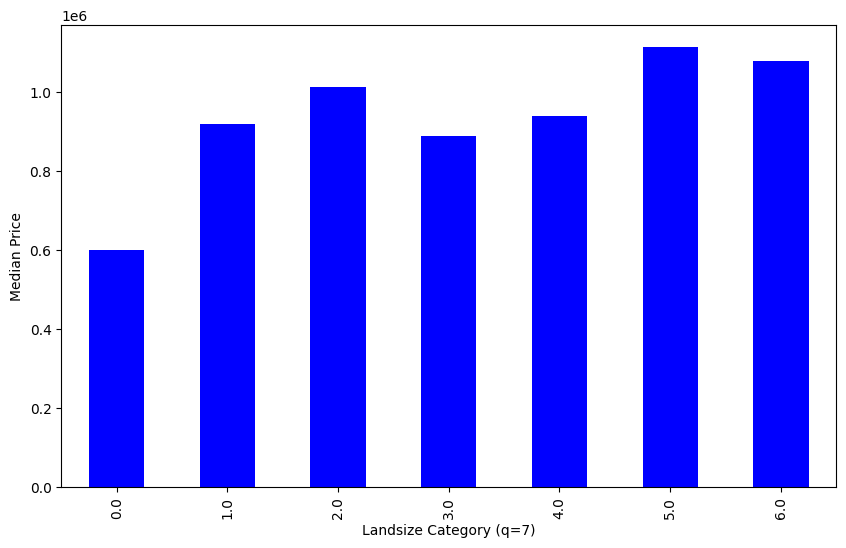

In [35]:
# Plotting the bar plot for q=7
plt.figure(figsize=(10, 6))
median_price_by_category_q7.plot(kind='bar', color='blue')
plt.xlabel('Landsize Category (q=7)')
plt.ylabel('Median Price')

# QQ Plot Skew & Kurtosis

Outliers Calculation

In [36]:
# Calculate quartiles and IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [37]:
# Define lower & upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [38]:
# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

In [39]:
len(outliers)

1278

In [40]:
# Percentage of outliers:
pct_outliers = (len(outliers)/len(df))*100
pct_outliers

4.690424633904651

Text(0, 0.5, 'values')

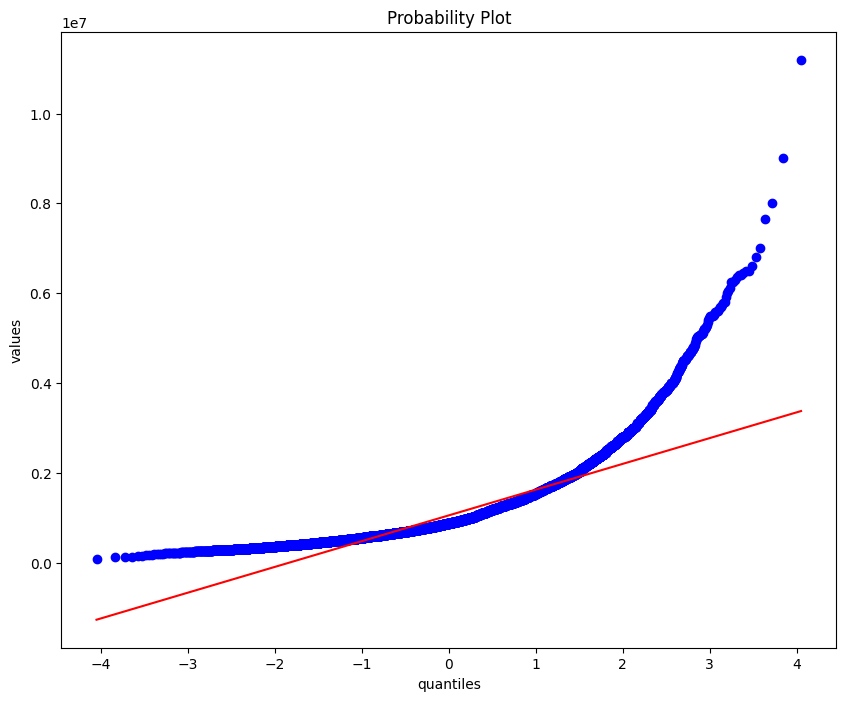

In [41]:
# QQ plot for 'Price' column
plt.figure(figsize=(10, 8))
stats.probplot(df['Price'], dist="norm", plot=plt)
plt.xlabel('quantiles')
plt.ylabel('values')

In [42]:
# Skewness and kurtosis for 'Price'
skewness = df['Price'].skew()
kurtosis = df['Price'].kurtosis()

In [43]:
skewness

2.5889693410528594

In [44]:
kurtosis

13.097200515556374

In [45]:
# Perform Kolmogorov-Smirnov test for normality
kstest_result = stats.kstest(df['Price'], 'norm')
kstest_result

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=85000, statistic_sign=-1)

# Chi Square & Cramer's V

In [46]:
# Create Price beans:
bins = [0, 250000, 500000, 750000, 1000000, float('inf')]
labels = ['<250k', '250k-500k', '500k-750k', '750k-1M', '>1M']

# Categorize 'Price' into 5 ranges:
df['Price_Category'] = pd.cut(df['Price'], bins=bins, labels=labels)

Chi Square analysis:

In [47]:
# Contingency table (crosstab) for 'Regionname' and 'Price_Category'
contingency_table_price_region = pd.crosstab(df['Regionname'], df['Price_Category'])
contingency_table_price_region

Price_Category,<250k,250k-500k,500k-750k,750k-1M,>1M
Regionname,,,,,
Eastern Metropolitan,0,85,548,957,1682
Eastern Victoria,0,24,84,49,9
Northern Metropolitan,19,1178,2719,1885,2063
Northern Victoria,0,56,75,24,11
South-Eastern Metropolitan,0,83,455,457,346
Southern Metropolitan,11,724,1333,1181,5275
Western Metropolitan,29,821,2075,1527,1363
Western Victoria,0,81,13,1,1


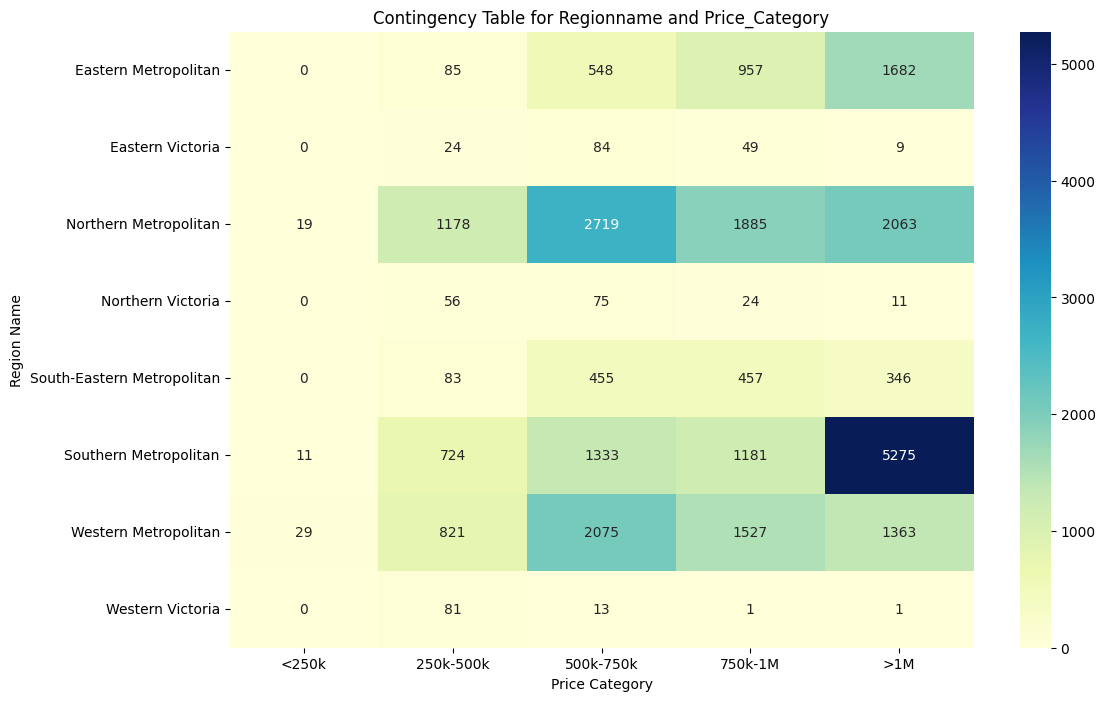

In [48]:
# Contingency table (crosstab) for 'Regionname' and 'Price_Category'
contingency_table_price_region = pd.crosstab(df['Regionname'], df['Price_Category'])

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table_price_region, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table for Regionname and Price_Category')
plt.xlabel('Price Category')
plt.ylabel('Region Name')
plt.show()

In [49]:
# Chi-square test
from scipy.stats import chi2_contingency
chi_test = chi2_contingency(contingency_table_price_region)
chi_test

Chi2ContingencyResult(statistic=4603.4983183020895, pvalue=0.0, dof=28, expected_freq=array([[7.08589047e+00, 3.66544707e+02, 8.76969021e+02, 7.30327118e+02,
        1.29107326e+03],
       [3.59491998e-01, 1.85960946e+01, 4.44917046e+01, 3.70520482e+01,
        6.55006607e+01],
       [1.70303920e+01, 8.80961973e+02, 2.10772750e+03, 1.75528498e+03,
        3.10299515e+03],
       [3.59491998e-01, 1.85960946e+01, 4.44917046e+01, 3.70520482e+01,
        6.55006607e+01],
       [2.90408897e+00, 1.50225077e+02, 3.59417927e+02, 2.99318052e+02,
        5.29134855e+02],
       [1.84596975e+01, 9.54898253e+02, 2.28462223e+03, 1.90260035e+03,
        3.36341947e+03],
       [1.25930480e+01, 6.51423433e+02, 1.55854977e+03, 1.29793771e+03,
        2.29449604e+03],
       [2.07898987e-01, 1.07543679e+01, 2.57301424e+01, 2.14276905e+01,
        3.78799002e+01]]))

Cramer's V test

In [50]:
from scipy.stats import chi2_contingency

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_price_region)

# Calculate Cramer's V coefficient
n = contingency_table_price_region.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table_price_region.shape) - 1)))

print("Cramer's V coefficient:", cramer_v)

Cramer's V coefficient: 0.20553158099798682


# Data Visualization


Text(0.5, 1.0, 'Boxplot between Year and Price')

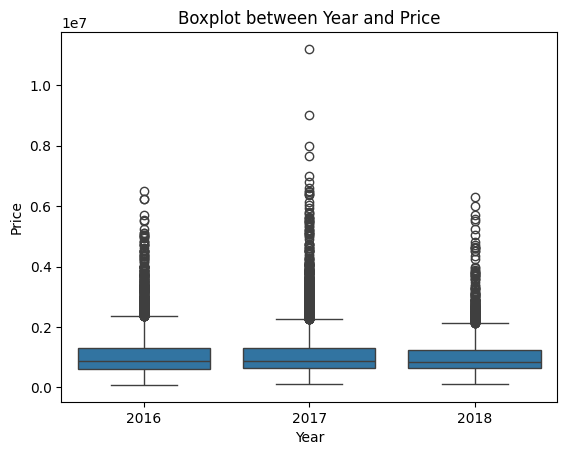

In [51]:
# Creating Boxplot with Price and Years:
sns.boxplot(x='Year', y='Price', data=df)
plt.title('Boxplot between Year and Price')

Text(0, 0.5, 'Price')

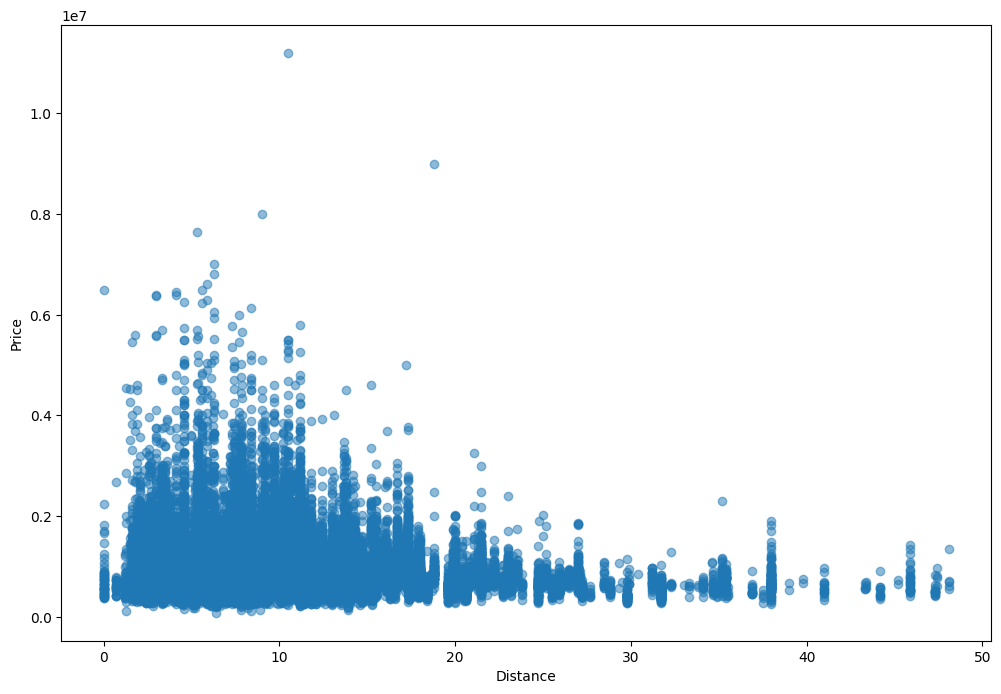

In [52]:
# Scatter Plot 'Distance' and 'Price'
plt.figure(figsize=(12,8))
plt.scatter(df['Distance'], df['Price'], alpha=0.5)
plt.xlabel('Distance')
plt.ylabel('Price')

Text(0, 0.5, 'price')

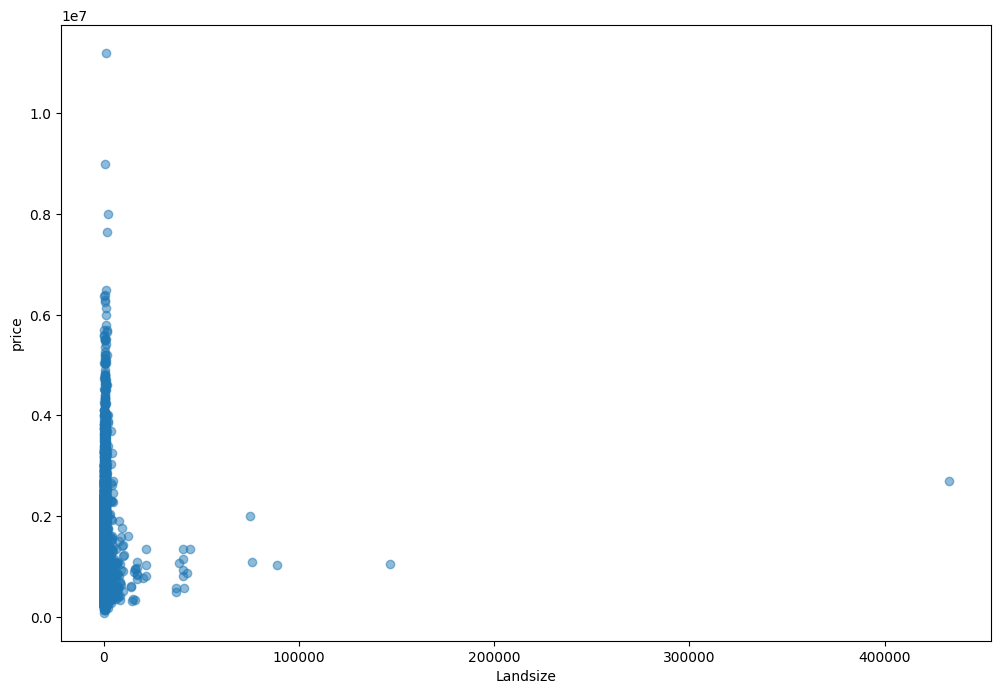

In [53]:
# Scatter Plot 'Landsize' and 'Price'
plt.figure(figsize=(12,8))
plt.scatter(df['Landsize'], df['Price'], alpha=0.5)
plt.xlabel('Landsize')
plt.ylabel('price')

No major relation between Landsize and Price.

<Axes: xlabel='Type', ylabel='Price'>

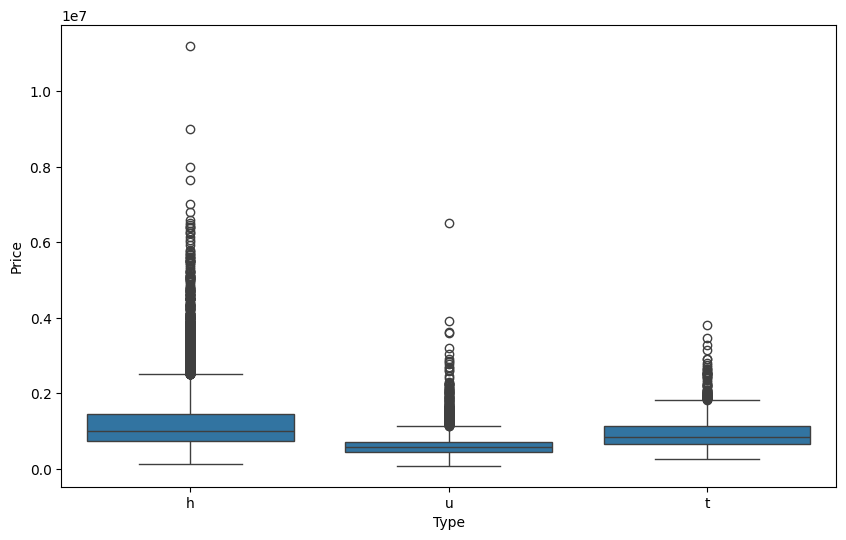

In [54]:
# Boxplot by Price and type (h, u, t)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df, order=['h', 'u', 't'])